<a href="https://colab.research.google.com/github/deepshikhachadokar/Time-series-analysis-on-Indian-Tourister-/blob/main/Indian_tourister_Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d

sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ts=pd.read_excel("/content/drive/MyDrive/file21.xlsx",index_col="date", parse_dates=True)
ts.T

date,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
Tourist,283750,262306,248965,185338,151098,176716,224432,196517,162326,181605,...,133768,78718,19765,36070,72501,92728,115661,191415,263867,317647


In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2001-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Tourist  252 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [ ]:
ts.index = pd.to_datetime(ts.index)

In [ ]:
#define CAGR function
def CAGR(ts_column):
    """
    Compound annual growth rate (CAGR). Growth rate that would be required for growth
    from its Beginning Balance to its Ending Balance.

    Parameters
    -----------
    ts_column = DataFrame column with Time Series data.

    Returns
    -----------
    Compound growth rate.
    """
    try:
        cagr = (ts_column[-1]/ts_column[0])**(1/(len(ts_column)-1))-1
        cagr = (cagr*100).round(2)
        return cagr
    except:
        print("Pass a Series or a DataFrame column.")

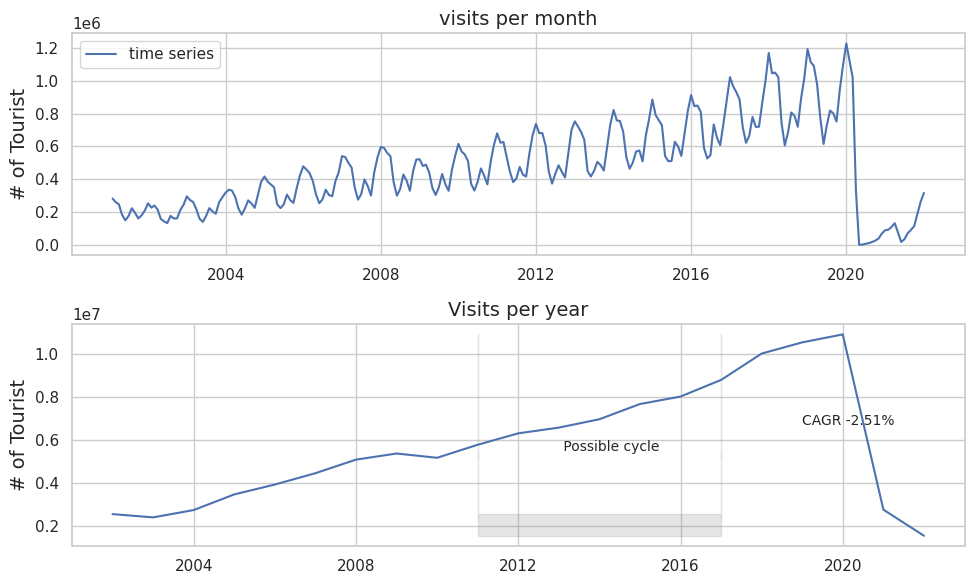

In [ ]:
ts_yr = ts["Tourist"].resample("A").sum()

# Plotting  original time series and annual view
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

ax[0].plot(ts["Tourist"])
ax[0].set_title("visits per month", size="14")
ax[0].set_ylabel('# of Tourist', size="14")
ax[0].legend(["time series", "ma12"])

ax[1].fill_betweenx(ts_yr, ts_yr["2010"].index,ts_yr["2016"].index, color="gray", alpha=0.2)
ax[1].plot(ts_yr)
ax[1].annotate("CAGR {}%".format(CAGR(ts_yr)), xy=(ts_yr["2018"].index, 6700000), size=10)
ax[1].annotate(" Possible cycle", xy=(ts_yr["2012"].index, 5500000), size=10)
ax[1].set_title("Visits per year", size="14")
ax[1].set_ylabel('# of Tourist', size="14")

fig.tight_layout()
plt.show()

In [ ]:
ts.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Tourist,252.0,480254.76,267916.85,2820.0,274125.25,447046.0,668740.25,1226398.0


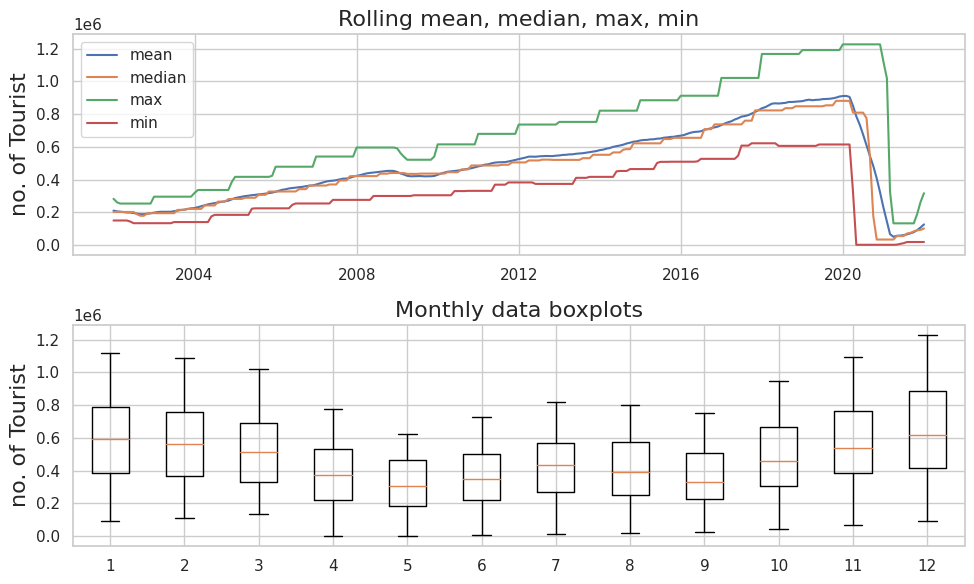

In [ ]:
#Plotting basic descriptive statistics
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

ax[0].plot(ts["Tourist"].rolling(12).agg(
    ["mean", "median", "max", "min"]), linestyle="solid")
ax[0].set_title("Rolling mean, median, max, min", size="16")
ax[0].set_ylabel('no. of Tourist', size="16")
ax[0].legend(["mean", "median", "max", "min"])

ts['Month'] = ts.index.month
ts['Year'] = ts.index.year
ts_piv = ts.pivot(index="Month", columns="Year", values="Tourist")

month_labels = ["Jan", "Feb", "Mar", "Apr", "May",
                "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ax[1].boxplot(ts_piv.T)
ax[1].set_title("Monthly data boxplots", size="16")
ax[1].set_ylabel('no. of Tourist', size="16")

fig.tight_layout()
plt.show()

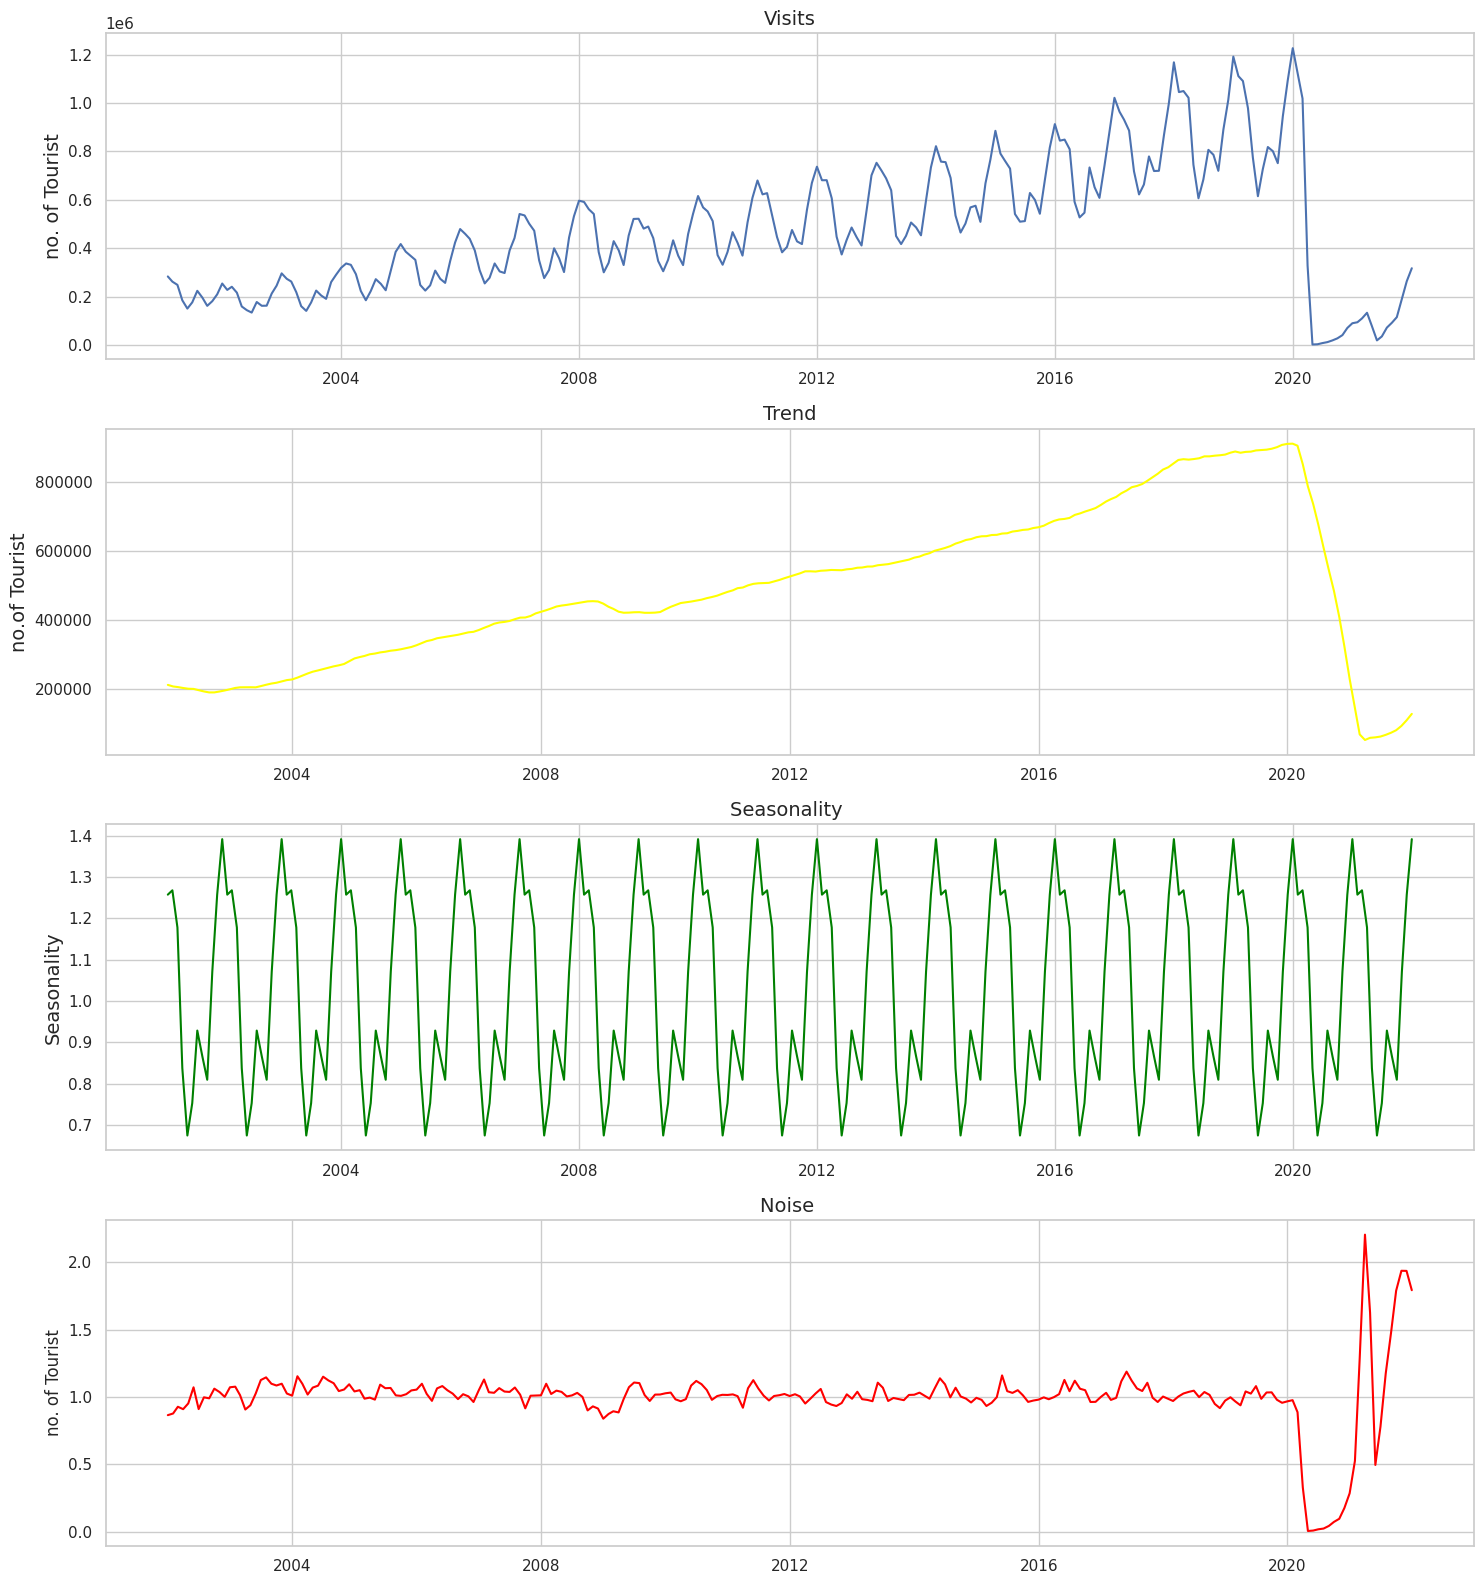

In [ ]:
# Identyfing trend using moving average
ts["MA12"] = ts["Tourist"].rolling(window=12).mean()

# Detrending time series
ts["Seasonality+Noise"] = ts["Tourist"] / ts["MA12"]

# Getting seasonality index
seasonality = list(ts.groupby("Month")["Seasonality+Noise"].mean())
ts["Seasonality"] = seasonality * int((ts.shape[0]/12))

# Identifying residuals
ts["Noise"] = ts["Tourist"]/(ts["MA12"]*ts["Seasonality"])
#ts["Noise"] = (ts["Tourist"]/(ts["Trend"]*ts["Seasonality"])-1)*ts["Trend"]

# Plotting results
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 16), sharex=False)

ax[0].plot(ts["Tourist"])
ax[0].set_title("Visits", size="14")
ax[0].set_ylabel('no. of Tourist', size="14")

ax[1].plot(ts["MA12"], linestyle="solid",color='yellow')
ax[1].set_title("Trend", size="14")
ax[1].set_ylabel('no.of Tourist', size="14")

ax[2].plot(ts["Seasonality"],color='green')
ax[2].set_title("Seasonality ", size="14")
ax[2].set_ylabel("Seasonality", size="14")

ax[3].plot(ts["Noise"],color='red')
ax[3].set_title("Noise ", size="14")
ax[3].set_ylabel('no. of Tourist')

fig.tight_layout()
plt.show()

In [ ]:
ts_piv

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,,,,,,,,
1,283750,228150,274215,337345,385977,459489,535631,591337,481308,568719,...,681002,720321,757786,790854,844533,964109,1045027,1111040,1119250,94662
2,262306,241133,262692,331697,369844,439090,501692,561393,489787,552152,...,681193,688569,755678,761007,848782,931025,1049259,1090516,1018440,110312
3,248965,216839,218473,293185,352094,391009,472494,541478,442062,512152,...,606456,639530,690441,729154,809107,885936,1021539,978236,328304,133768
4,185338,159789,160941,223884,248416,309208,350550,384203,347544,371956,...,447581,450580,535321,541551,592004,717899,745033,774651,2820,78718
5,151098,144571,141508,185502,225394,255008,277017,300840,305183,332087,...,374476,417453,465043,509869,527466,622408,606513,615136,3764,19765
6,176716,134566,176324,223122,246970,278370,310364,340159,352353,384642,...,433390,451223,502028,512341,546972,663470,683935,726446,8590,36070
7,224432,178231,225359,272456,307870,337332,399866,429456,432900,466715,...,485808,506427,568871,628323,733834,779309,806493,818125,12655,72501
8,196517,162594,204940,253301,273856,304387,358446,391423,369707,422173,...,445632,486338,575750,599478,652111,719129,785993,800837,19761,92728
9,162326,163089,191339,226773,257184,297891,301892,330874,330707,369821,...,411562,453561,509142,542600,608177,719964,719894,751513,28167,115661


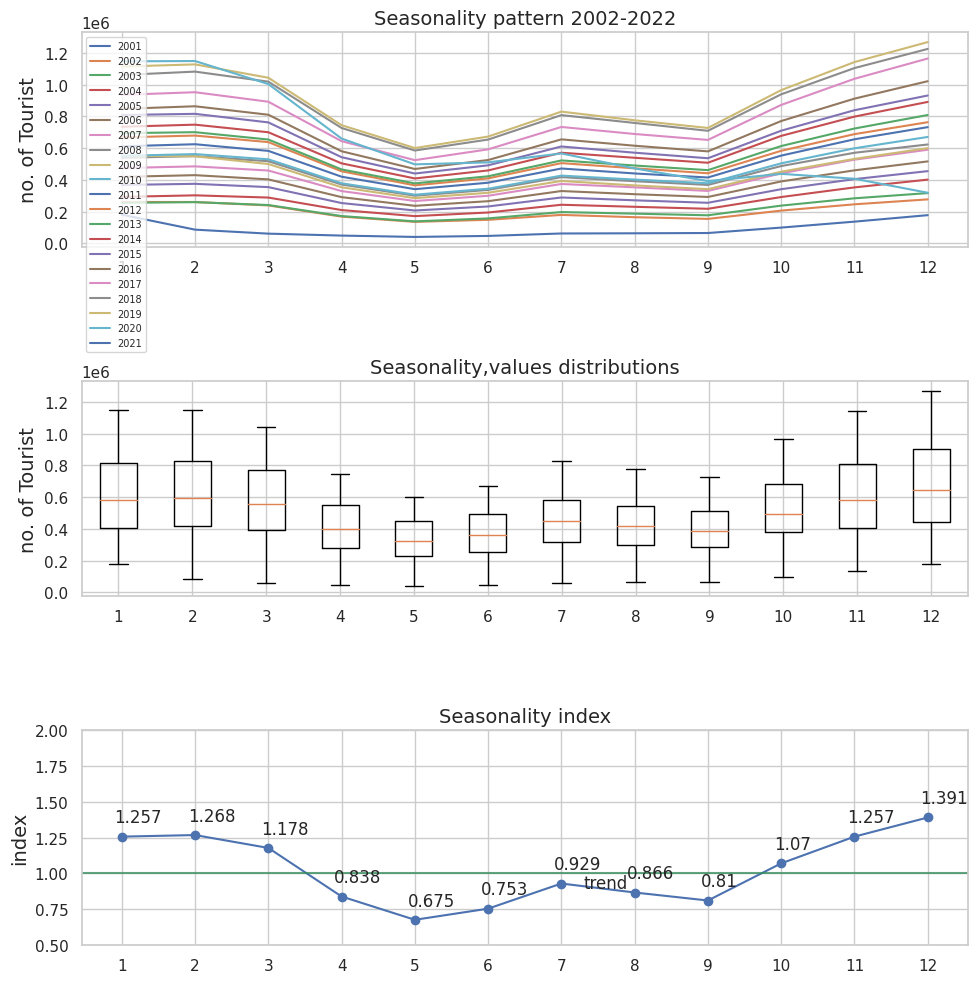

In [ ]:
# deeper dive into seasonality
ts["Seasonality_Tourist"] = (ts["Seasonality"] * ts["MA12"])
ts_piv = ts.pivot(index='Month', columns="Year", values="Seasonality_Tourist")

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=False)

ax[0].plot(ts_piv)
ax[0].set_title("Seasonality pattern 2002-2022", size="14")
ax[0].set_ylabel('no. of Tourist', size="14")
ax[0].set_xticks(ts_piv.index)
ax[0].legend(ts_piv.columns,loc='upper left',fontsize=7)

ax[1].boxplot(ts_piv.iloc[:, 1:].T)
ax[1].set_title("Seasonality,values distributions", size="14")
ax[1].set_ylabel('no. of Tourist', size="14")
ax[1].set_xticks(ts_piv.index)

sindex = pd.Series(data=ts.groupby("Month")[
                   "Seasonality"].mean(), name="Seasonality_Index").round(3)

ax[2].plot(sindex, marker="o")
ax[2].axhline(1.0, linestyle="solid", color="seagreen", alpha=0.75)
ax[2].annotate(text="trend", xy=(7.3, 0.9))
ax[2].set_title("Seasonality index", size="14")
ax[2].set_ylabel('index', size="14")
ax[2].set_ylim(bottom=0.5, top=2.0)
ax[2].set_xticks(sindex.index)

for x, y in zip(sindex.index, sindex):
    ax[2].annotate(text=sindex.iloc[x-1], xy=(x-0.1, y+0.1))

plt.tight_layout()
plt.show()

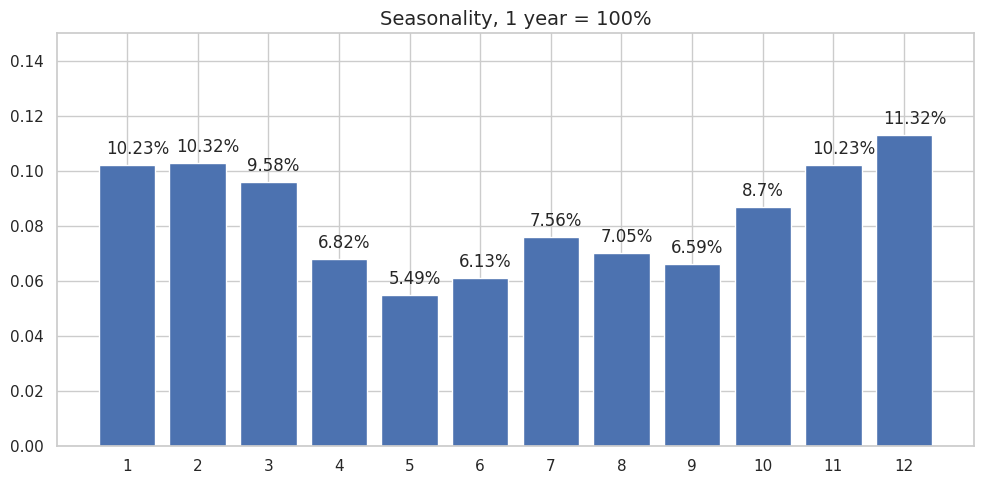

In [ ]:
# plotting seasonality in a more usefull terms
x = [i for i in range(1, 13)]
y = [(i/sindex.sum()).round(3) for i in sindex]
s = [str(((i/sindex.sum())*100).round(2))+"%" for i in sindex]

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.ylim(top=0.15)
plt.title("Seasonality, 1 year = 100%", size=14)

for s, x, y in zip(s, x, y):
    plt.annotate(s, xy=(x, y), xytext=(x-0.3, y+0.004), size=12)

plt.xticks(sindex.index)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# preparing data for linear regression
y = ts["MA12"].reset_index(drop=True)[12:].values.reshape(-1, 1)
X = ts["MA12"].reset_index(drop=True)[12:].index.values.reshape(-1, 1)
print("y shape :", y.shape)
print("X shape :", X.shape)

y shape : (240, 1)
X shape : (240, 1)


In [ ]:
lr = LinearRegression()
model = lr.fit(X, y)
slope = lr.coef_[0, 0]
intercept = lr.intercept_[0]

# linear regression results
y_pred = [x * slope + intercept for x in range(len(ts))]
ts["LR"] = y_pred

print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  1987.9658425782848
Intercept:  233187.00975651114


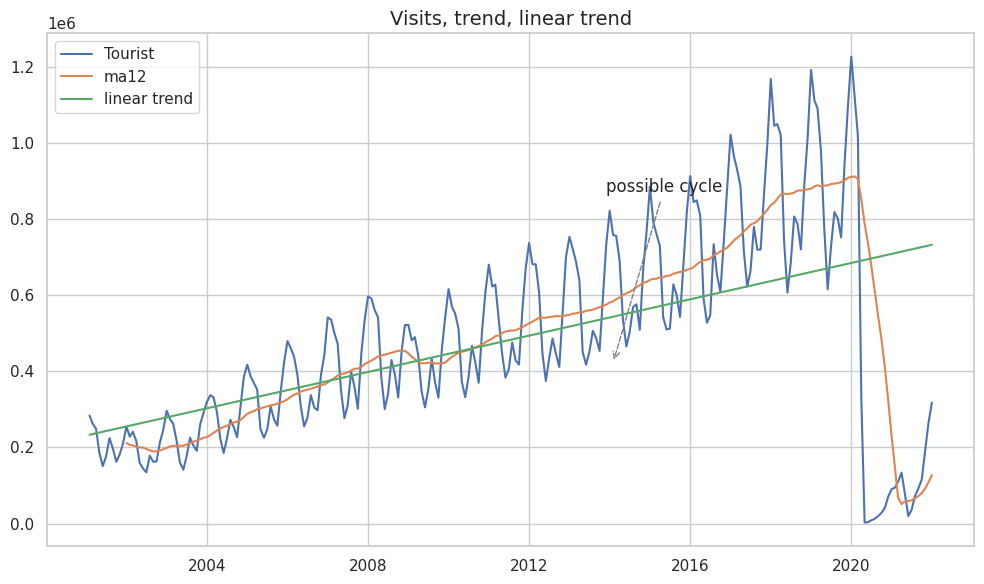

In [ ]:
# plotting lr results
fig = plt.figure(figsize=(10, 6))

plt.plot(ts[["Tourist", "MA12", "LR"]])
plt.legend(["Tourist", "ma12", "linear trend"])
plt.title("Visits, trend, linear trend", size=14)
plt.annotate("possible cycle",
             xy=(pd.Timestamp('2014-01-31'), 423000),
             xytext=(pd.Timestamp('2013-11-30'), 870000),
             arrowprops=dict(arrowstyle='->', ls="dashed", lw=1, color="gray"))

plt.tight_layout()
plt.show()

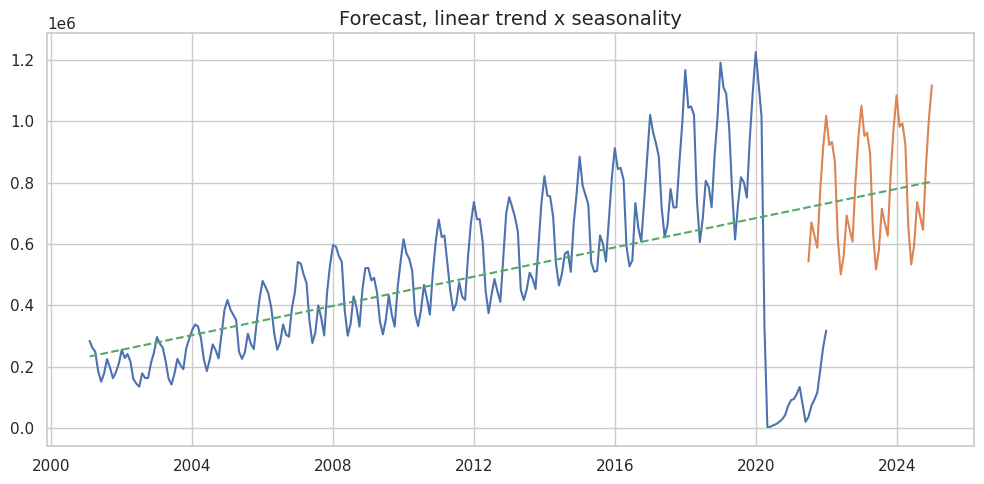

In [ ]:
trend = [x * slope + intercept for x in range(288)]
season = seasonality*24
y_pred = [a*b for a, b in zip(trend, season)]
labels = pd.date_range(start="2001-01-31", end="2024-12-31", freq="M")

ts_fcast = pd.DataFrame({"Trend": trend, "Forecast": y_pred, "Index": labels}).set_index("Index", drop=True)
ts_fcast["Tourist"] = ts["Tourist"]

fig = plt.figure(figsize=(10, 5))

plt.plot(ts_fcast["Tourist"])
plt.plot(ts_fcast["Forecast"][245:])
plt.plot(ts_fcast["Trend"], linestyle="dashed")
plt.title("Forecast, linear trend x seasonality", size=14)

plt.tight_layout()
plt.show()

In [ ]:
# calculating R2
vs_mean = ts_fcast["Tourist"].mean()
SSE = sum((ts_fcast["Tourist"][:252] - ts_fcast["Forecast"][:252])**2)
SSW = sum((ts_fcast["Tourist"][:252] - ts_fcast["Tourist"][:252].transform(func=lambda x:  x - vs_mean))**2)
R2 = 1-SSE/SSW
print("R2:", round(R2, 3))

R2: 0.81


In [ ]:
# adfuller tests for stationarity
print("TS d=0 P-value: ", adfuller(ts["Tourist"])[1].round(3))
print("TS d=1 P-value: ",
      adfuller(ts["Tourist"].diff(periods=1).dropna())[1].round(3))
print("TS d=2 P-value: ",
      adfuller(ts["Tourist"].diff(periods=1).diff(periods=1).dropna())[1].round(3))

TS d=0 P-value:  0.049
TS d=1 P-value:  0.008
TS d=2 P-value:  0.0


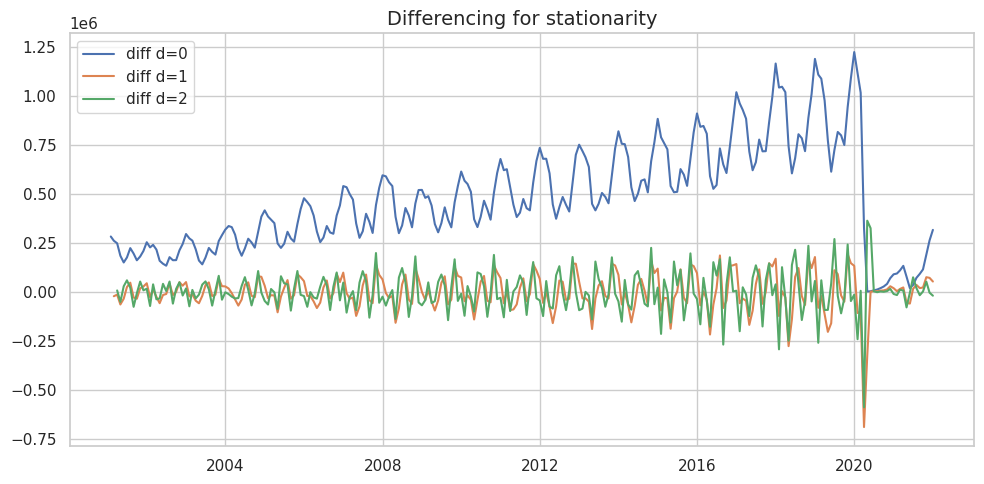

In [ ]:
# Plotting the results
fig = plt.figure(figsize=(10, 5))

plt.plot(ts["Tourist"])
plt.plot(ts["Tourist"].diff(periods=1))
plt.plot(ts["Tourist"].diff(periods=1).diff(periods=1))
plt.legend(["diff d=0", "diff d=1", "diff d=2"])
plt.title("Differencing for stationarity", size=14)

fig.tight_layout()
plt.show()

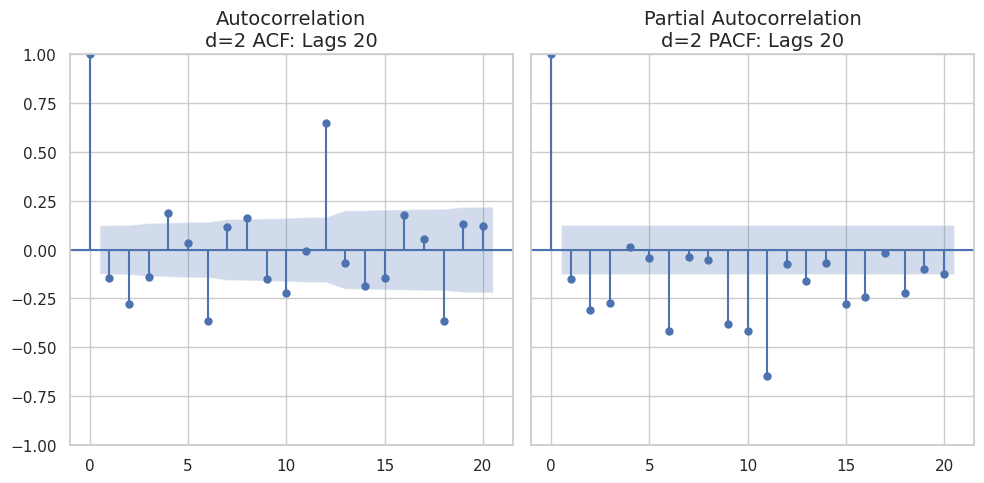

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
plot_acf(ts["Tourist"].diff(periods=1).diff(periods=1).dropna(), lags=20, ax=ax[0])  # q
ax[0].set_title("Autocorrelation\nd=2 ACF: Lags 20", size=14)
plot_pacf(ts["Tourist"].diff(periods=1).diff(periods=1).dropna(), lags=20, ax=ax[1])  # p
ax[1].set_title("Partial Autocorrelation\nd=2 PACF: Lags 20", size=14)

fig.tight_layout()
plt.show()

In [ ]:
training_data=ts["Tourist"][0:217]
testing_data=ts["Tourist"][217:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
## arima= ARIMA(training_data,order=(p,d,q))

arima=ARIMA(training_data,order=(3,2,4))

In [ ]:
model=arima.fit()

In [ ]:
## doing predictions..

pred=model.forecast(steps=len(testing_data))

In [ ]:
np.sqrt(mean_squared_error(testing_data,pred))

946735.2417862881

In [ ]:
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,6)

In [ ]:
orders=[]
for p in p_values:
  for d in d_values:
    for q in q_values:
      order=(p,d,q)
      orders.append(order)

In [ ]:
## arima= ARIMA(training_data,order=(p,d,q))
for i in orders:
  arima=ARIMA(training_data,order=i)
  model=arima.fit()
  pred=model.forecast(steps=len(testing_data))
  print(f"order {i} has mean square error {np.sqrt(mean_squared_error(testing_data,pred))}")

order (0, 0, 0) has mean square error 428458.2157935046
order (0, 0, 1) has mean square error 422720.14624627924
order (0, 0, 2) has mean square error 413893.5018919342
order (0, 0, 3) has mean square error 412036.3005973348
order (0, 0, 4) has mean square error 411290.88745022396
order (0, 0, 5) has mean square error 407538.8045685377
order (0, 1, 0) has mean square error 822997.3065735999
order (0, 1, 1) has mean square error 770300.1736941846
order (0, 1, 2) has mean square error 772509.0295712878
order (0, 1, 3) has mean square error 658855.9896105939
order (0, 1, 4) has mean square error 635363.0440565964
order (0, 1, 5) has mean square error 647478.5155143163
order (0, 2, 0) has mean square error 941198.0709543554
order (0, 2, 1) has mean square error 925059.1356739198
order (0, 2, 2) has mean square error 857324.7716658432
order (0, 2, 3) has mean square error 860215.5960605178
order (0, 2, 4) has mean square error 823736.4576369963
order (0, 2, 5) has mean square error 822822.6

In [ ]:
model = ARIMA(training_data, order=(2, 2, 2))
arima_fit = model.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Tourist   No. Observations:                  217
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2735.005
Date:                Thu, 18 May 2023   AIC                           5480.011
Time:                        15:31:19   BIC                           5496.864
Sample:                    01-31-2001   HQIC                          5486.820
                         - 01-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8891      0.044     20.345      0.000       0.803       0.975
ar.L2         -0.7743      0.049    -15.709      0.000      -0.871      -0.678
ma.L1         -1.2622      0.023    -54.817      0.0

In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

p = d = q = range(0, 7)
pdq = list(itertools.product(p, d, q))

params = []
aic = []

for param in pdq:
    try:
        model = ARIMA(ts["Tourist"], order=param, freq="M")
        arima_fit = model.fit()
        params.append(param)
        aic.append(arima_fit.aic)
    except:
        continue

if aic:
    order = params[aic.index(min(aic))]
    p = order
else:
    # Handle the case when no models were successfully fitted
    p = None


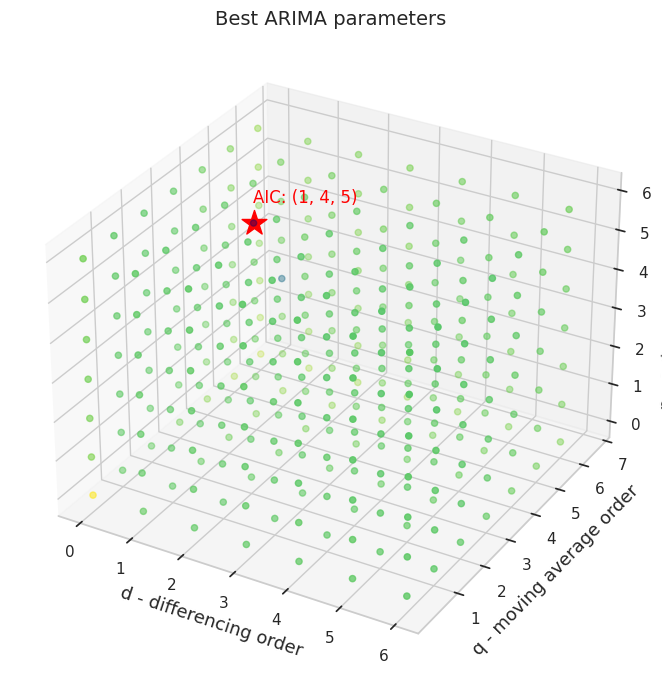

In [ ]:
p = [p for p, d, q in params]
d = [d for p, d, q in params]
q = [q for p, d, q in params]

fig = plt.figure(figsize=(9, 7))

ax = plt.axes(projection='3d')
ax.scatter(p, d, q, c=aic, cmap="viridis")
ax.scatter(*order, c="red", s=350, marker="*")

a, b, c = order
c = c* 1.1
ax.text(a,b,c, f"AIC: {order}", c="red")


ax.set_title("Best ARIMA parameters", size=14)
ax.set_xlabel("d - differencing order", size=13)
ax.set_ylabel("q - moving average order", size=13)
ax.set_zlabel("p - autoregression order", size=13)
ax.set_yticks([1,2,3,4,5,6,7])

plt.tight_layout()
plt.show()

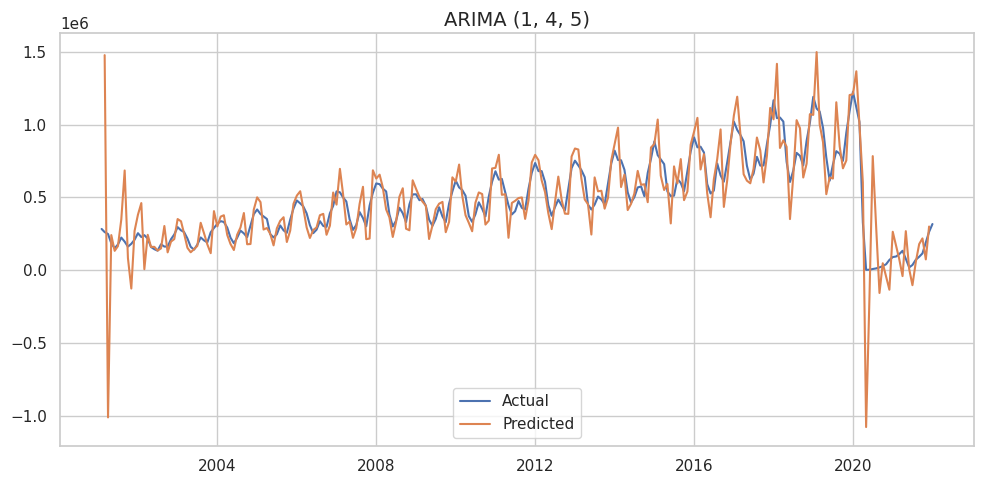

In [ ]:
import matplotlib.pyplot as plt

# Your previous code snippet here

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Get the predicted values
predictions = arima_fit.predict(start=1, end=250)

# Plot the actual values and the predictions
ax.plot(ts["Tourist"], label="Actual")
ax.plot(predictions, label="Predicted")

# Set the title of the plot
ax.set_title("ARIMA {}".format(order), size=14)

# Add a legend
ax.legend()

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()


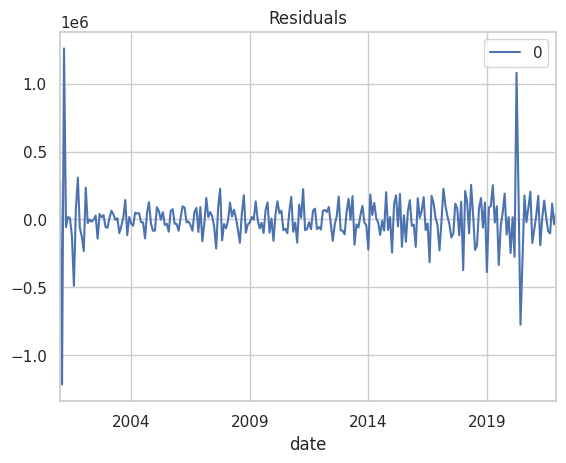

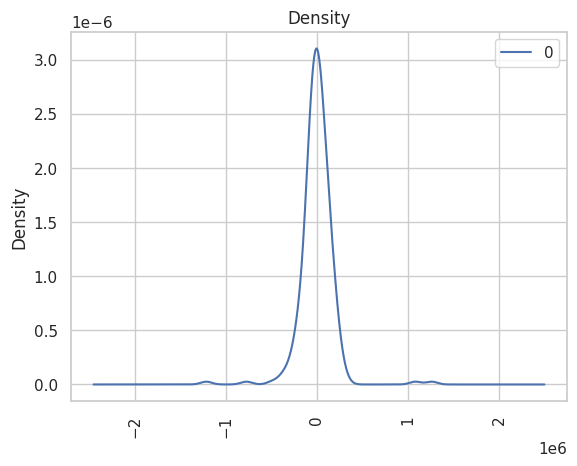

In [ ]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Density')
plt.xticks(rotation=90)
plt.show()